# Lewis Hamilton

<img src="https://www.formula1.com/content/fom-website/en/drivers/lewis-hamilton/_jcr_content/image.img.1920.medium.jpg/1641811370907.jpg" width="300">

### Team: Mercedes

<img src ="https://www.formula1.com/content/fom-website/en/drivers/lewis-hamilton/_jcr_content/helmet.img.png/1646824671908.png" width="200">

In [2]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.3 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.1.17     

Warning message

In [3]:
initialize_master()

Rows: 79 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): circuitRef, name, location, country, alt, url
dbl (3): circuitId, lat, lng


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 12716 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): positionText
dbl (6): constructorStandingsId, raceId, constructorId, points, position, wins


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 11950 Columns: 5

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): status
dbl (4): constructorResultsId, raceId, constructorId, points


ℹ Use `spec()` to retrieve the full column specification for this

In [4]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

# Filtering Lap Data For Individual Driver

ham_laps <- lap_data %>%
            filter(driverId == 1)

# Season Analysis

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9488.502


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5694803,94.91338,1.58189


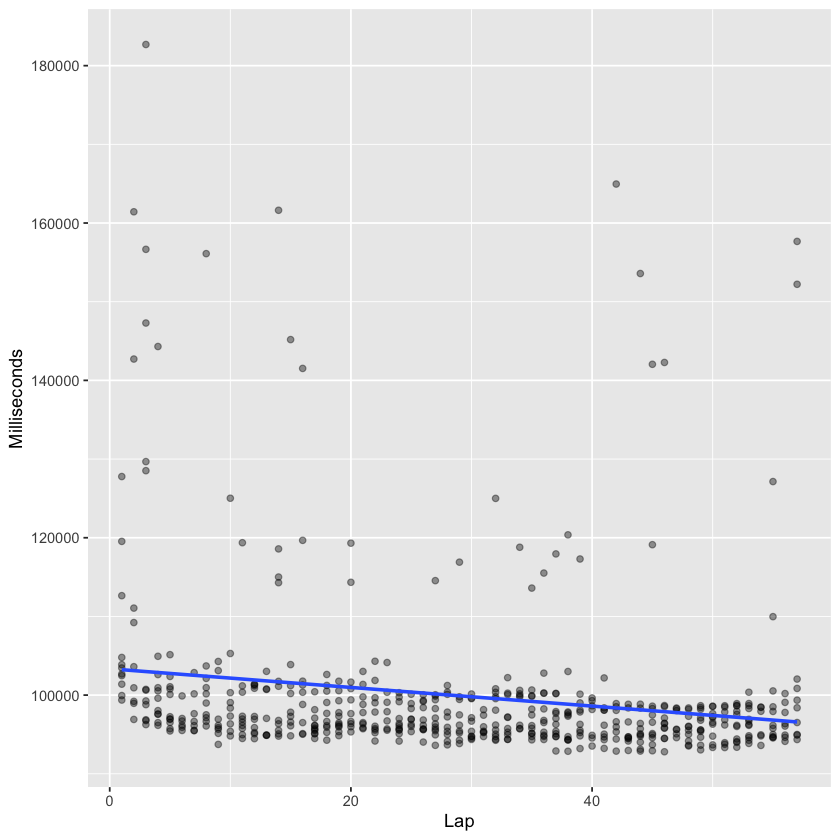

In [5]:
#1.  Bahrain 

lh_bahrain <- ham_laps %>%
                filter(raceId %in% bahrain_race_ID) 

lh_bahrain_clean <- lh_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 49)

lh_bahrain_clean_ID <- lh_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_bahrain_races <- ham_laps %>%
                    filter(raceId %in% lh_bahrain_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r1_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r1_rmse

### GETS PREDICTION

get_bahrain_prediction()

raceId,n
<dbl>,<int>
1042,66
1054,66


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,5819.403


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5568660,92.811,1.54685


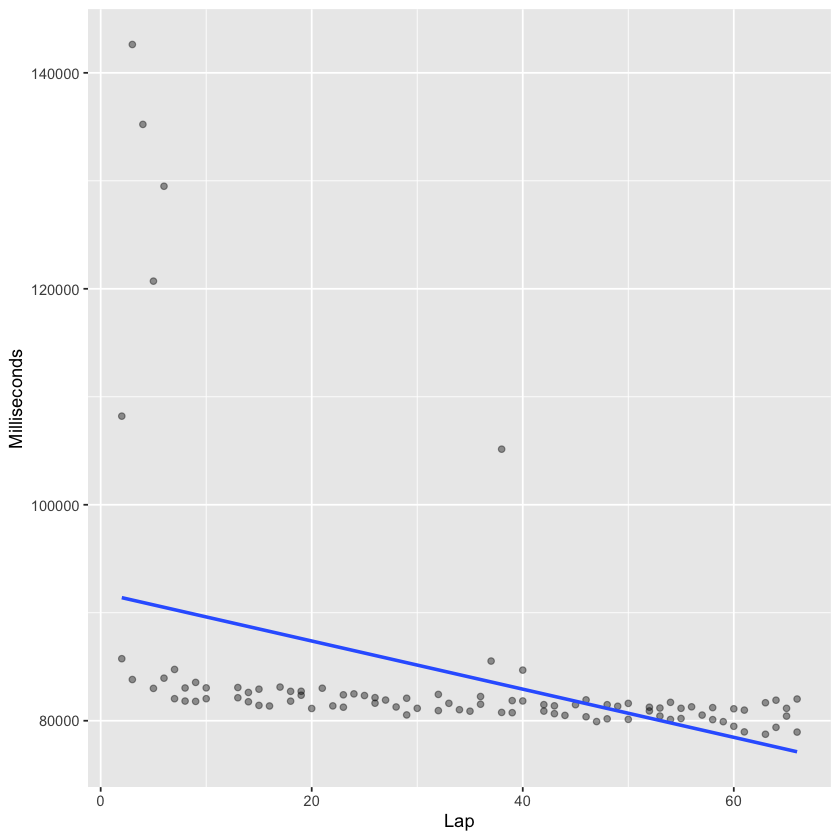

In [6]:
#2. Portimão

lh_Portimão <- ham_laps %>%
                filter(raceId %in% Portimão_race_ID) 

lh_Portimão_clean <- lh_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_Portimão_clean
lh_Portimão_clean_ID <- lh_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_Portimão_races <- ham_laps %>%
                    filter(raceId %in% lh_Portimão_clean_ID) 

formulaone_split <- initial_split(lh_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r2_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r2_rmse

### GETS PREDICTION

get_Portimão_prediction()

raceId,n
<dbl>,<int>
1,58
18,58
36,58
338,58
841,58
860,58
880,58
926,58
989,58


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9478.975


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5467254,91.12089,1.518682


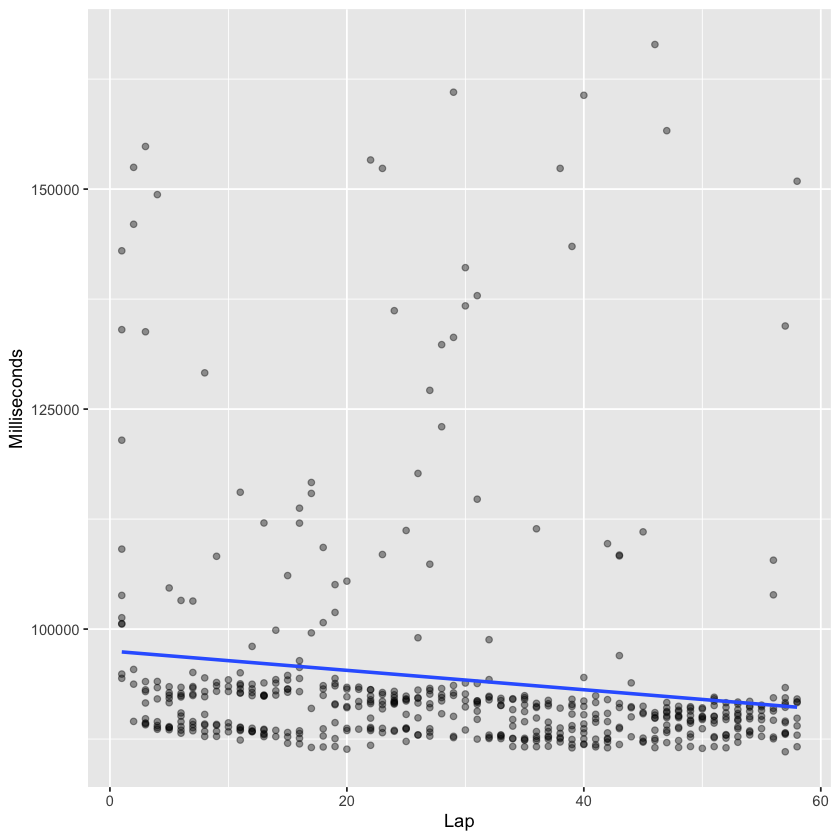

In [7]:
#3.  Australia

lh_aus <- ham_laps %>%
                filter(raceId %in% aus_race_ID) 

lh_aus_clean <- lh_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 2)
lh_aus_clean
lh_aus_clean_ID <- lh_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_aus_races <- ham_laps %>%
                    filter(raceId %in% lh_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r3_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r3_rmse

### GETS PREDICTION

get_australia_prediction()

raceId,n
<dbl>,<int>
1043,63
1053,63


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,19615.47


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5600608,93.34347,1.555725


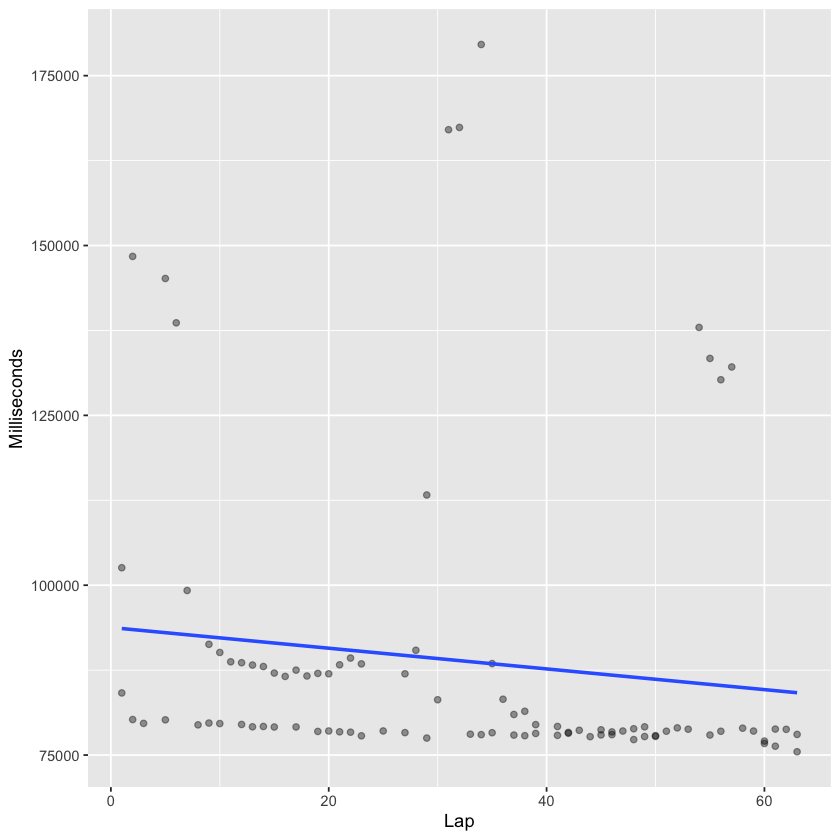

In [8]:
#4.  Italy, Imola

lh_imola <- ham_laps %>%
                filter(raceId %in% imola_race_ID) 

lh_imola_clean <- lh_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_imola_clean
lh_imola_clean_ID <- lh_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_imola_races <- ham_laps %>%
                    filter(raceId %in% lh_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r4_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r4_rmse

### GETS PREDICTION

get_imola_prediction()

raceId,n
<dbl>,<int>
7,58
22,58
47,58
343,58
844,58
1044,58
1067,58


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6917.571


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5355712,89.26186,1.487698


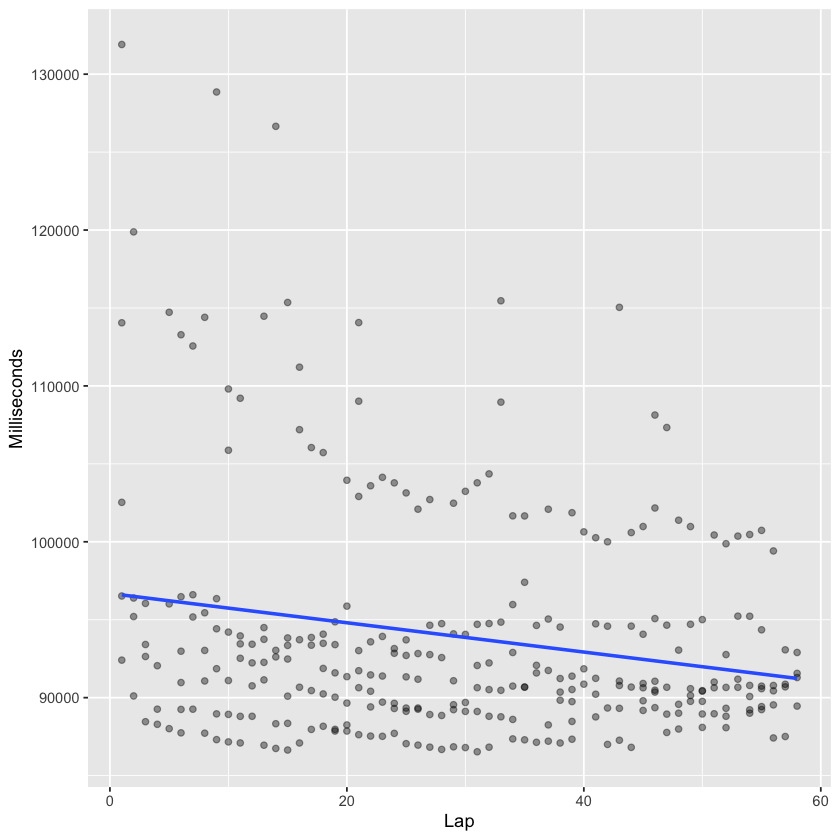

In [9]:
#5. Turkey (Replacing Miami)

lh_turkey <- ham_laps %>%
                filter(raceId %in% turkey_race_ID) 

lh_turkey_clean <- lh_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_turkey_clean
lh_turkey_clean_ID <- lh_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_turkey_races <- ham_laps %>%
                    filter(raceId %in% lh_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r5_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r5_rmse

### GETS PREDICTION

get_miami_prediction()

raceId,n
<dbl>,<int>
21,66
845,66
864,66
904,66
930,66
973,66
993,66
1014,66
1036,66


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9508.04


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5830147,97.16911,1.619485


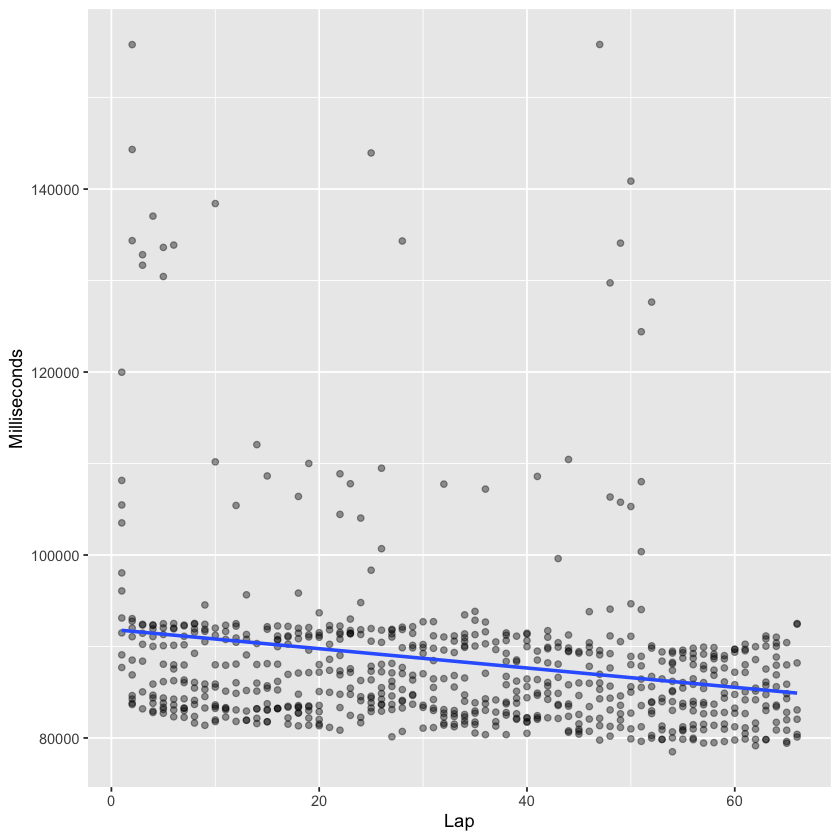

In [10]:
#6.  Spain

lh_spain <- ham_laps %>%
                filter(raceId %in% spain_race_ID) 

lh_spain_clean <- lh_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_spain_clean
lh_spain_clean_ID <- lh_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_spain_races <- ham_laps %>%
                    filter(raceId %in% lh_spain_clean_ID)

formulaone_split <- initial_split(lh_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r6_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r6_rmse

### GETS PREDICTION

get_spain_prediction()

raceId,n
<dbl>,<int>
40,78
342,78
846,78
865,78
885,78
905,78
931,78
953,78
974,78


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,11826.37


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6544717,109.0786,1.817977


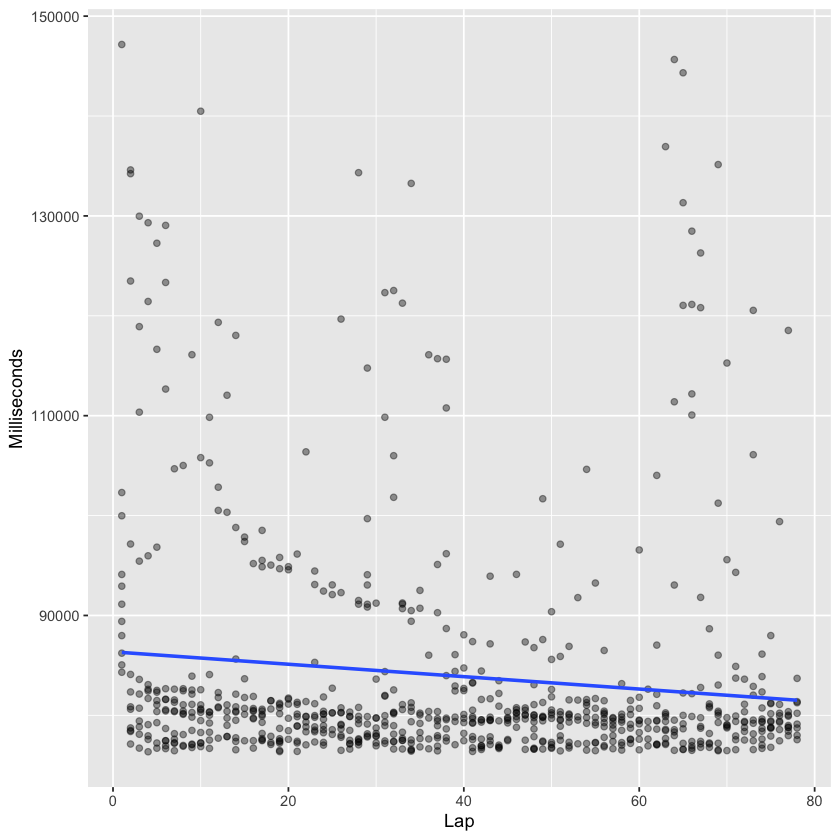

In [11]:
#7.   Monaco

lh_monaco <- ham_laps %>%
                filter(raceId %in% monaco_race_ID) 

lh_monaco_clean <- lh_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_monaco_clean
lh_monaco_clean_ID <- lh_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_monaco_races <- ham_laps %>%
                    filter(raceId %in% lh_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r7_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r7_rmse

### GETS PREDICTION

get_monaco_prediction()

raceId,n
<dbl>,<int>
955,51
976,51
992,51
1013,51
1057,51


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,22488.87


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5857112,97.61853,1.626976


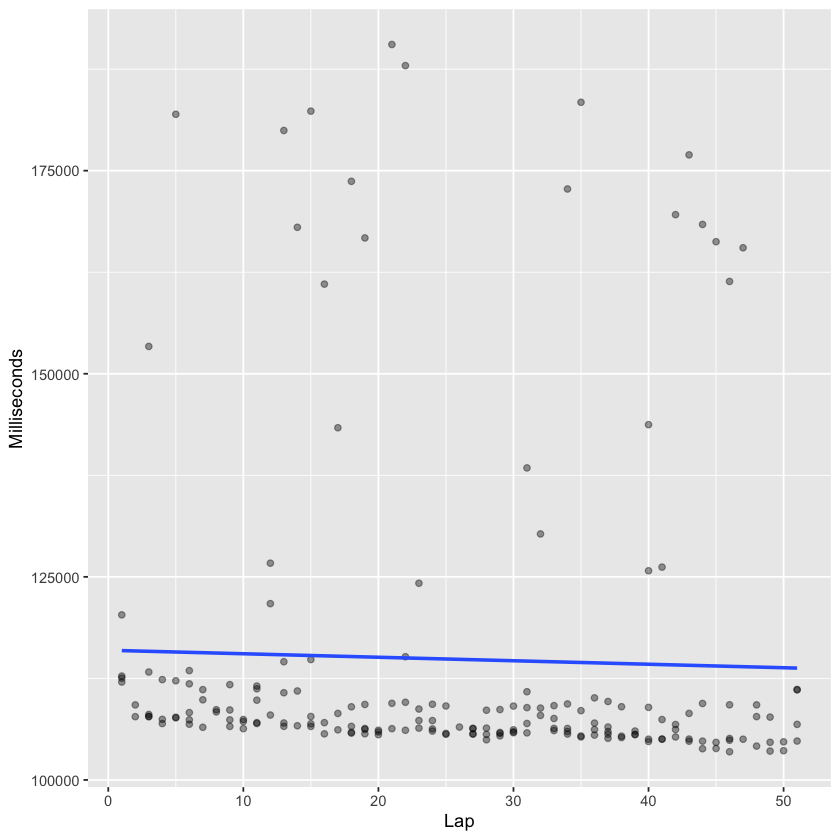

In [12]:
#8.  Azerbaijan

lh_azerbaijan <- ham_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

lh_azerbaijan_clean <- lh_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_azerbaijan_clean
lh_azerbaijan_clean_ID <- lh_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_azerbaijan_races <- ham_laps %>% 
                    filter(raceId %in% lh_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r8_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r8_rmse

### GETS PREDICTION

get_azerbaijan_prediction()

raceId,n
<dbl>,<int>
41,70
344,70
866,70
886,70
932,70
954,70
975,70
1016,70
995,68


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9067.744


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5603644,93.39407,1.556568


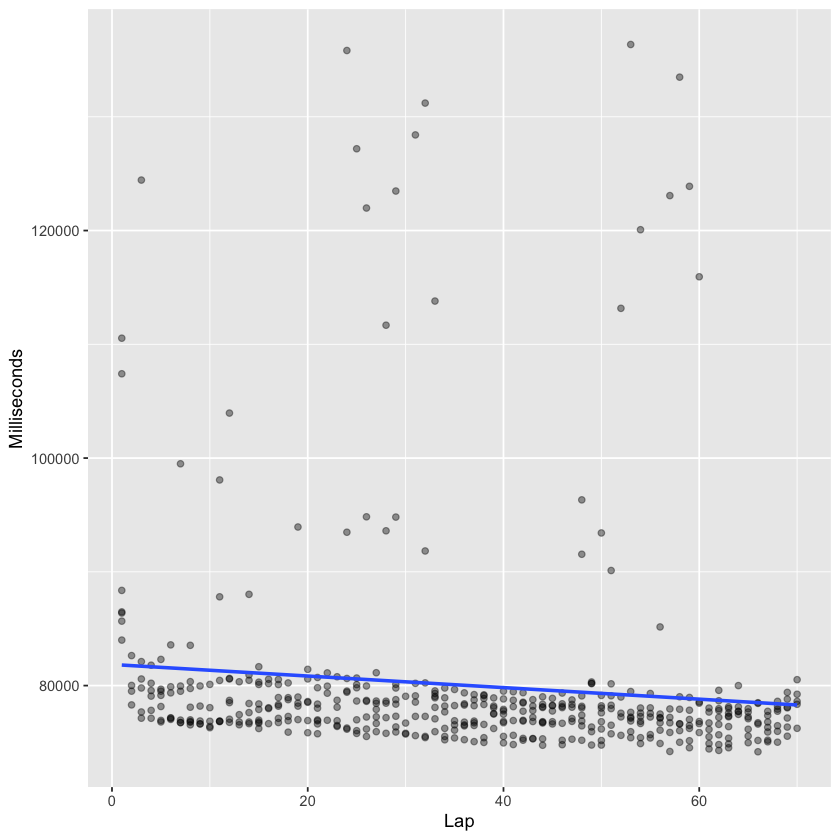

In [13]:
#9.  Canada

lh_canada <- ham_laps %>%
                filter(raceId %in% canada_race_ID) 

lh_canada_clean <- lh_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n == 68 | n == 70)
lh_canada_clean
lh_canada_clean_ID <- lh_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_canada_races <- ham_laps %>%
                    filter(raceId %in% lh_canada_clean_ID)

formulaone_split <- initial_split(lh_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r9_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r9_rmse

### GETS PREDICTION

get_canada_prediction()

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,15113.39


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5200397,86.67329,1.444555


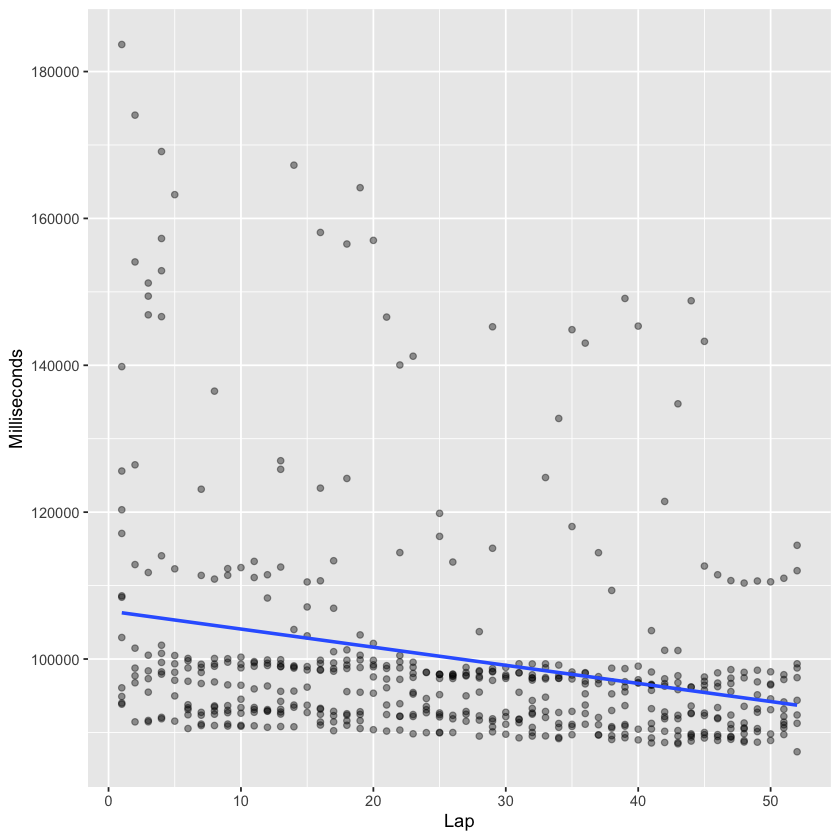

In [14]:
#10.  Great Britain

lh_uk <- ham_laps %>%
                filter(raceId %in% uk_race_ID) 

lh_uk_clean <- lh_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter (n == 52 | n == 51)

lh_uk_clean_ID <- lh_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_uk_races <- ham_laps %>%
                    filter(raceId %in% lh_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r10_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r10_rmse

### GETS PREDICTION

get_uk_prediction()

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9911.666


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5132783,85.54639,1.425773


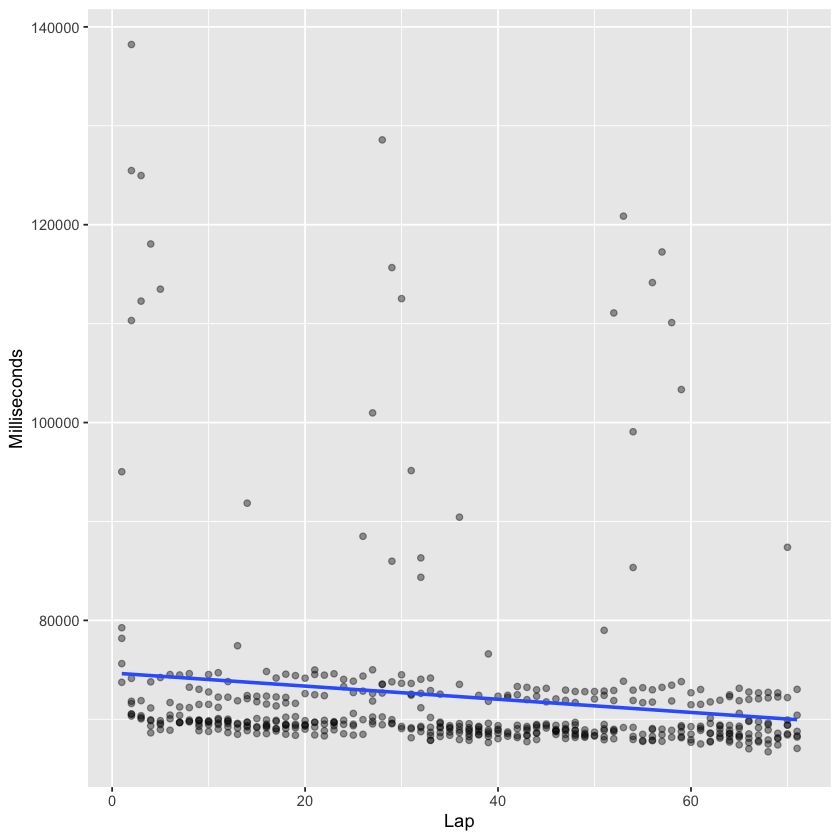

In [15]:
#11.  Austria

lh_austria <- ham_laps %>%
                filter(raceId %in% austria_race_ID) 

lh_austria_clean <- lh_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 62)

lh_austria_clean_ID <- lh_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_austria_races <- ham_laps %>%
                    filter(raceId %in% lh_austria_clean_ID)

formulaone_split <- initial_split(lh_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r11_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r11_rmse

### GETS PREDICTION

get_austria_prediction()

raceId,n
<dbl>,<int>
996,53
1017,53
1059,53


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9593.369


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5254604,87.57673,1.459612


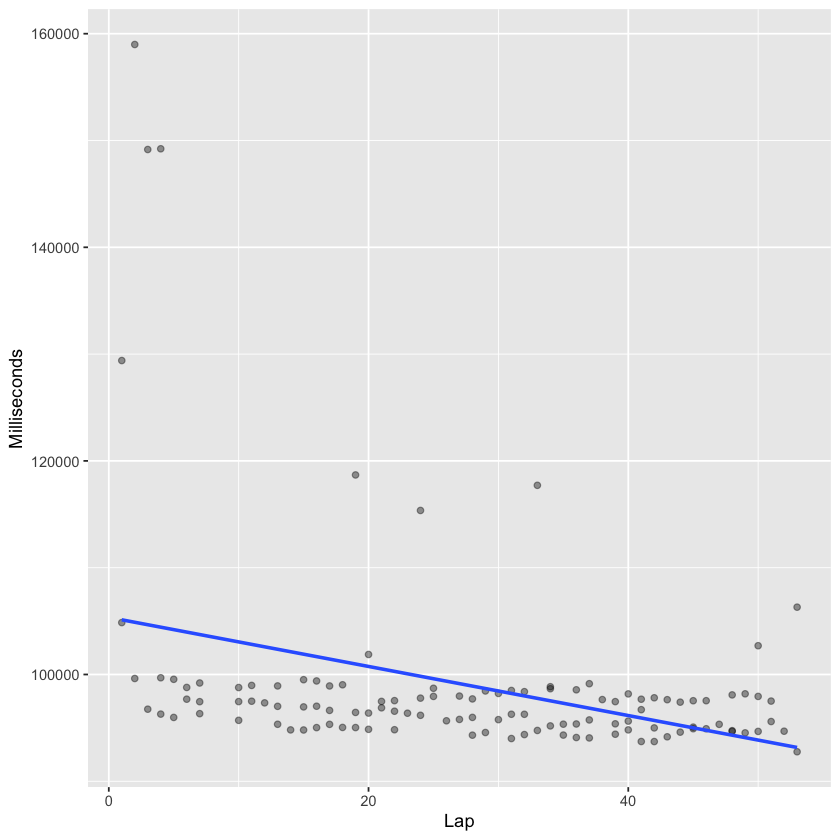

In [16]:
#12.  France

lh_france <- ham_laps %>%
                filter(raceId %in% france_race_ID) 

lh_france_clean <- lh_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_france_clean
lh_france_clean_ID <- lh_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_france_races <- ham_laps %>%
                    filter(raceId %in% lh_france_clean_ID)

formulaone_split <- initial_split(lh_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r12_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r12_rmse

### GETS PREDICTION

get_france_prediction()

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,10088.85


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6053487,100.8915,1.681524


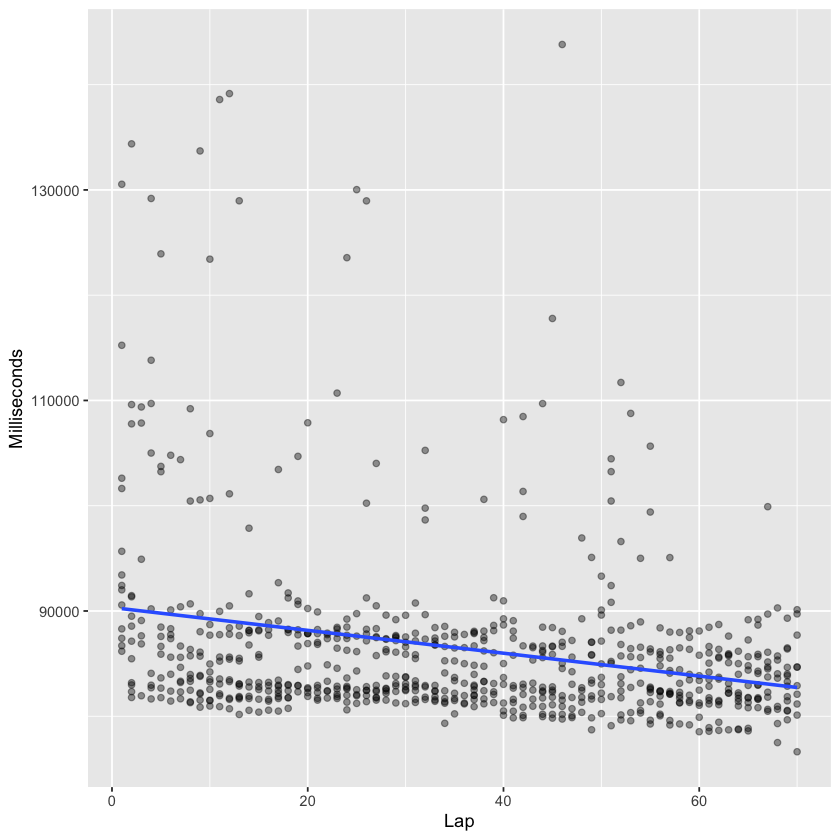

In [20]:
#13.  Hungary

lh_hungary <- ham_laps %>%
                filter(raceId %in% hungary_race_ID) 

lh_hungary_clean <- lh_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 23)

lh_hungary_clean_ID <- lh_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_hungary_races <- ham_laps %>%
                    filter(raceId %in% lh_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r13_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r13_rmse

## GETS PREDICTION

get_hungary_prediction()

raceId,n
<dbl>,<int>
30,44
49,44
349,44
891,44
960,44
980,44
1001,44
1022,44
1037,44


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,18598.77


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5057730,84.2955,1.404925


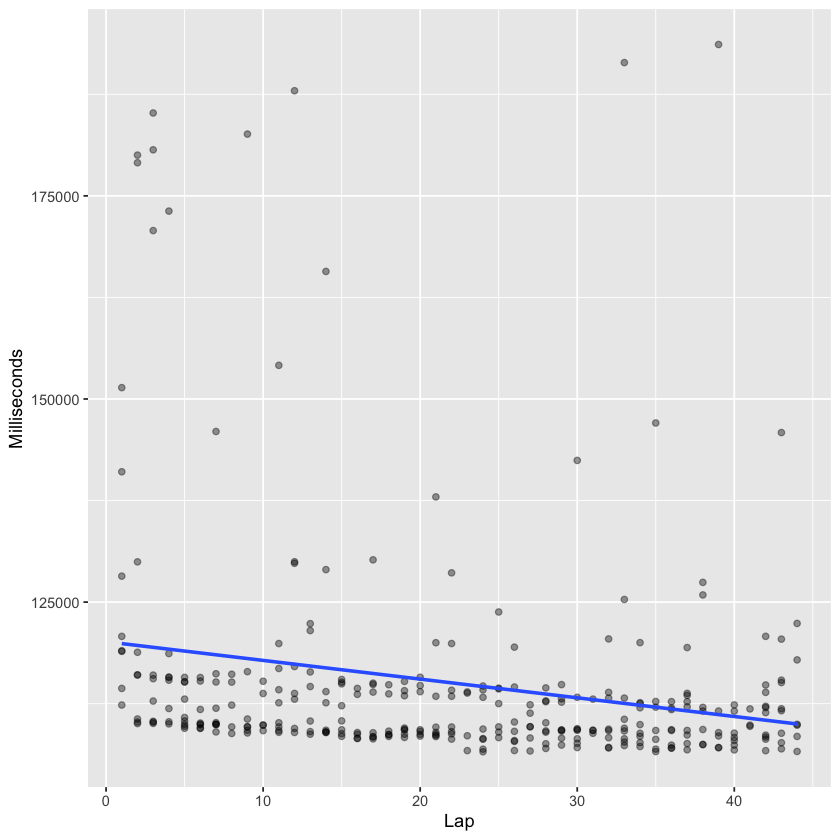

In [21]:
#14.  Belgium

lh_belgium <- ham_laps %>%
                filter(raceId %in% belgium_race_ID) 

lh_belgium_clean <- lh_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 44 | n== 43)
lh_belgium_clean
lh_belgium_clean_ID <- lh_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_belgium_races <- ham_laps %>%
                    filter(raceId %in% lh_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r14_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r14_rmse

### GETS PREDICTION

get_belgium_prediction()

raceId,n
<dbl>,<int>
1064,72


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20.
* Stratification will use 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1273.566


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5443217,90.72028,1.512005


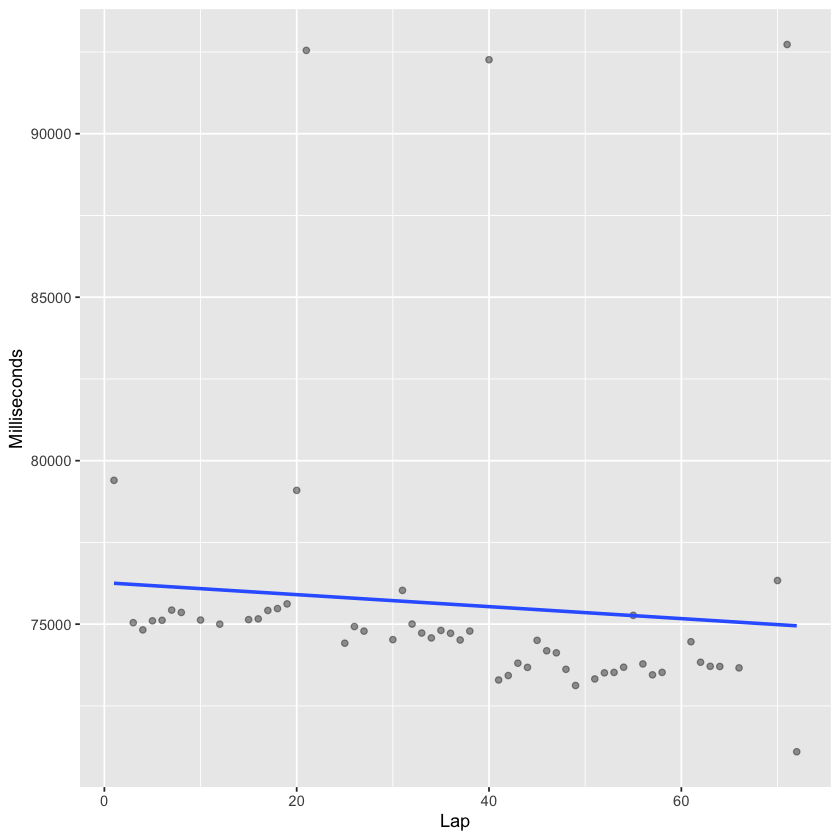

In [22]:
#15.  Netherlands

lh_netherlands <- ham_laps %>%
                filter(raceId %in% netherlands_race_ID) 

lh_netherlands_clean <- lh_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
lh_netherlands_clean
lh_netherlands_clean_ID <- lh_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_netherlands_races <- ham_laps %>%
                    filter(raceId %in% lh_netherlands_clean_ID)

formulaone_split <- initial_split(lh_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r15_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r15_rmse

### GETS PREDICTION

get_netherlands_prediction()

raceId,n
<dbl>,<int>
31,53
48,53
853,53
872,53
892,53
912,53
938,53
961,53
981,53


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7551.433


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4742687,79.04478,1.317413


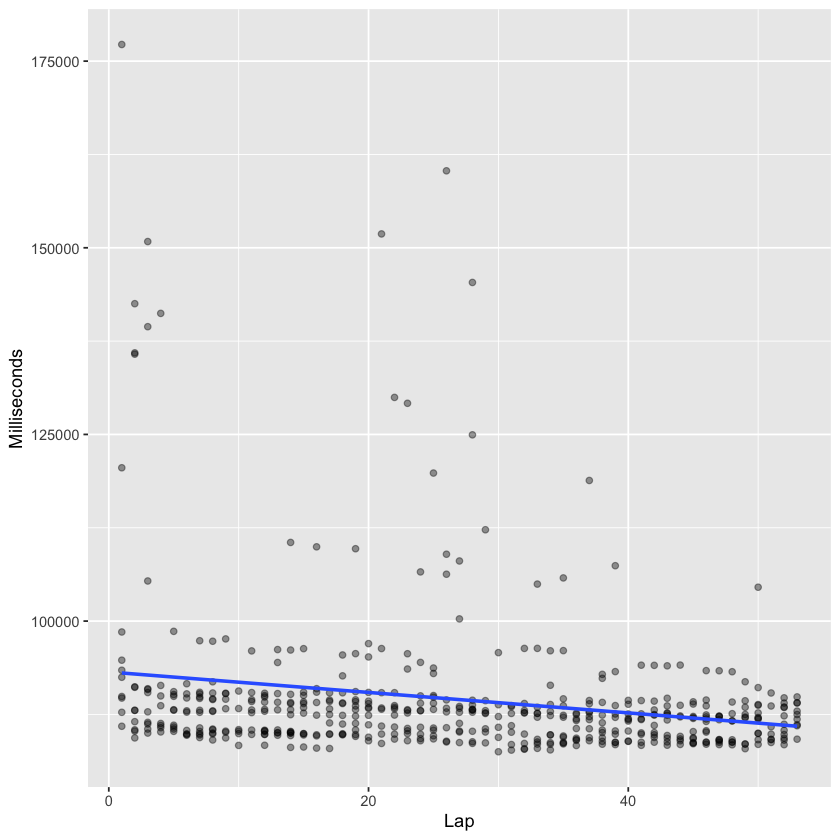

In [23]:
#16.  Italy, Monza

lh_monza <- ham_laps %>%
                filter(raceId %in% monza_race_ID) 

lh_monza_clean <- lh_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n != 25)
lh_monza_clean
lh_monza_clean_ID <- lh_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_monza_races <- ham_laps %>%
                    filter(raceId %in% lh_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(lh_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r16_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r16_rmse

### GETS PREDICTION

get_monza_prediction()

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,19182.41


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
7129704,118.8284,1.980473


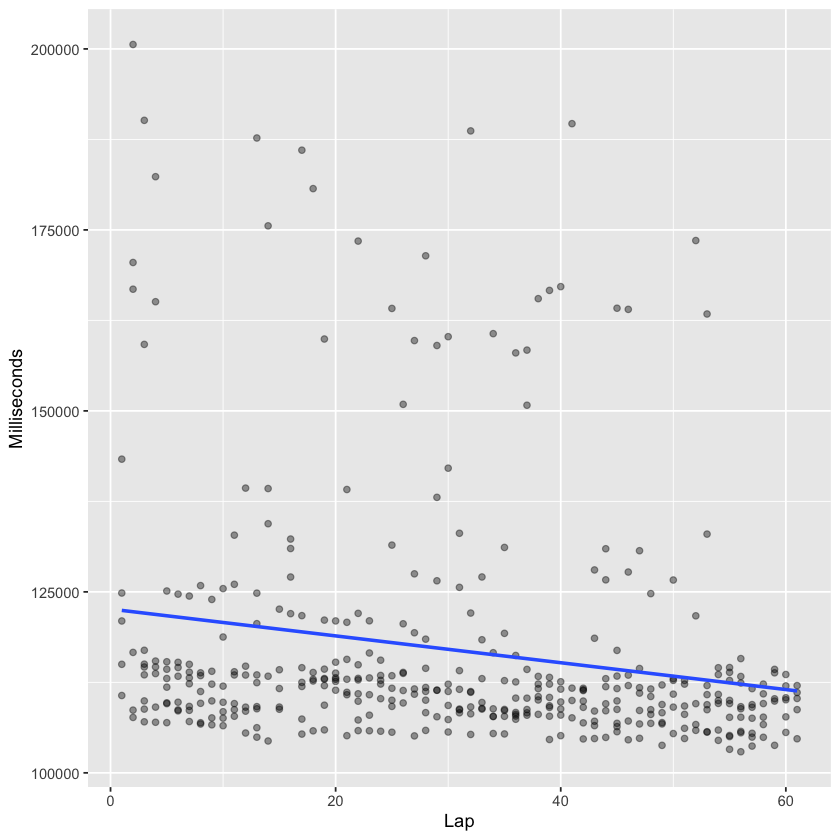

In [24]:
#17.  Singapore

lh_singapore <- ham_laps %>%
                filter(raceId %in% singapore_race_ID) 

lh_singapore_clean <- lh_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 61| n == 60| n == 58)

lh_singapore_clean_ID <- lh_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_singapore_races <- ham_laps %>%
                    filter(raceId %in% lh_singapore_clean_ID)

formulaone_split <- initial_split(lh_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r17_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r17_rmse

### GETS PREDICTION

get_singapore_prediction()

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,9467.932


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5308378,88.47296,1.474549


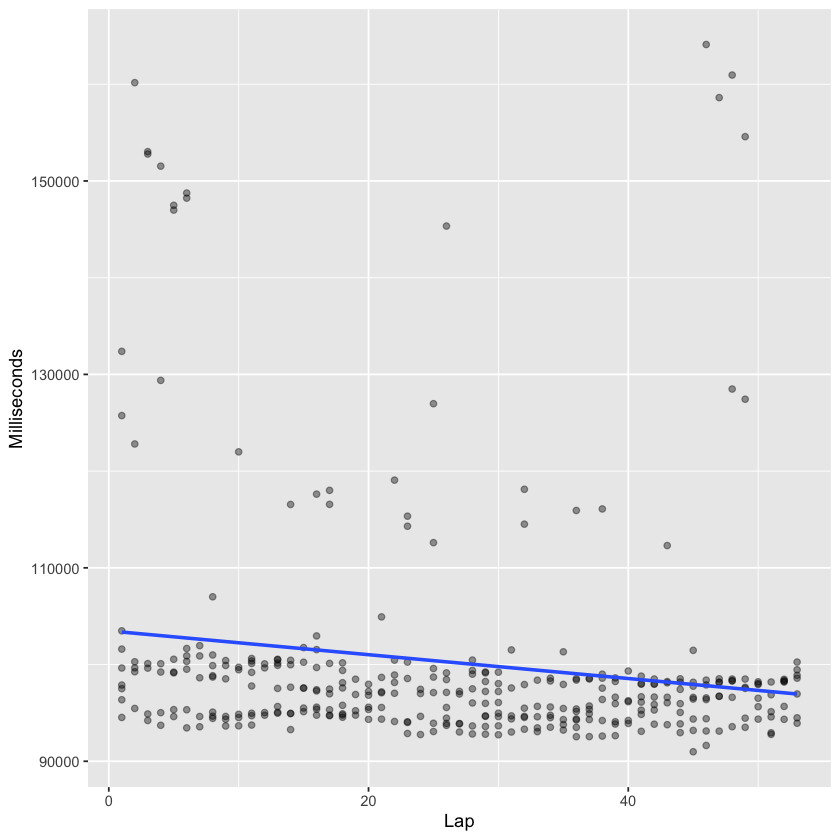

In [25]:
#18.  Japan

lh_japan <- ham_laps %>%
                filter(raceId %in% japan_race_ID) 

lh_japan_clean <- lh_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 53| n == 52)

lh_japan_clean_ID <- lh_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_japan_races <- ham_laps %>%
                    filter(raceId %in% lh_japan_clean_ID)

formulaone_split <- initial_split(lh_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r18_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r18_rmse

### GETS PREDICTION

get_japan_prediction()

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,10446.45


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5877602,97.96004,1.632667


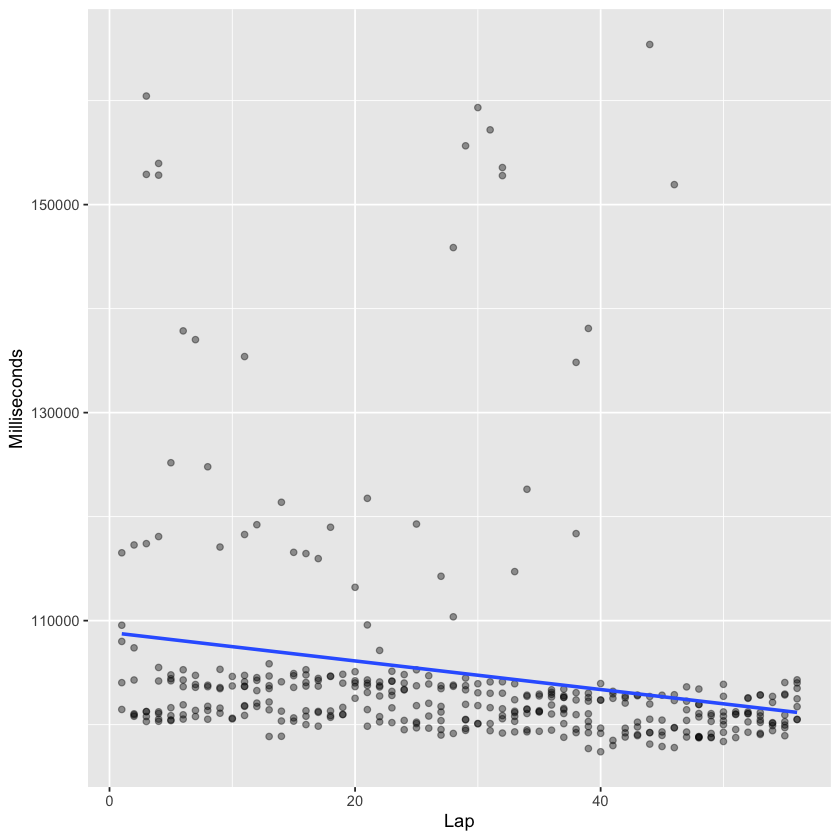

In [26]:
#19.  USA, Austin

lh_austin <- ham_laps %>%
                filter(raceId %in% austin_race_ID) 

lh_austin_clean <- lh_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

lh_austin_clean_ID <- lh_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_austin_races <- ham_laps %>%
                    filter(raceId %in% lh_austin_clean_ID)

formulaone_split <- initial_split(lh_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r19_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r19_rmse

### GETS PREDICTION

get_austin_prediction()

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,6387.128


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5994831,99.91386,1.665231


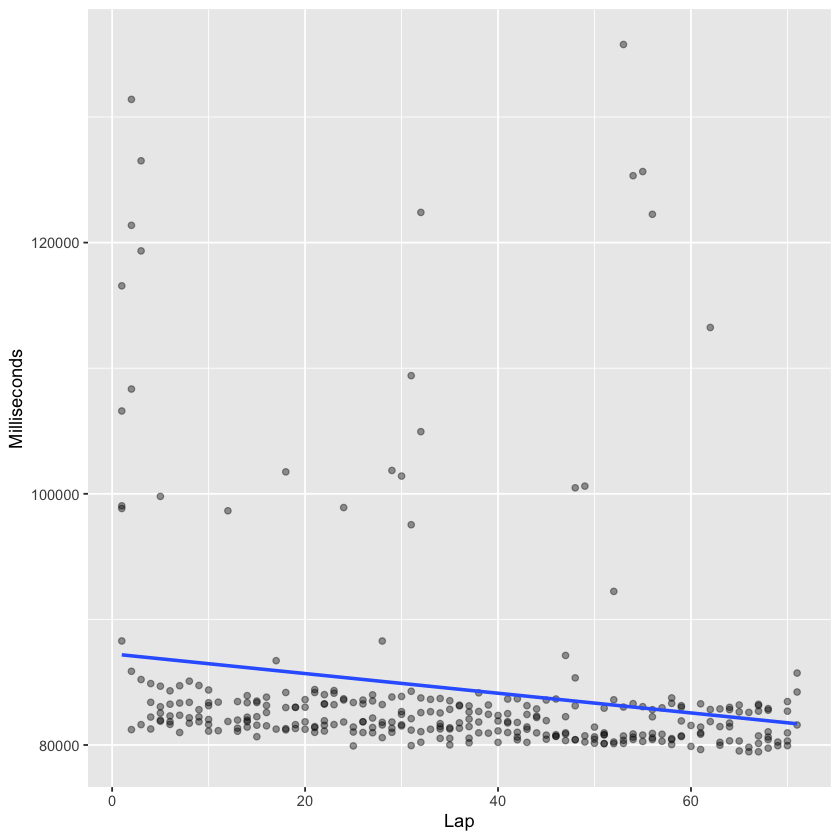

In [27]:
#20.  Mexico

lh_mexico <- ham_laps %>%
                filter(raceId %in% mexico_race_ID) 

lh_mexico_clean <- lh_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

lh_mexico_clean_ID <- lh_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_mexico_races <- ham_laps %>%
                    filter(raceId %in% lh_mexico_clean_ID)

formulaone_split <- initial_split(lh_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r20_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r20_rmse

### GETS PREDICTION

get_mexico_prediction()

`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,13464.92


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5650714,94.17856,1.569643


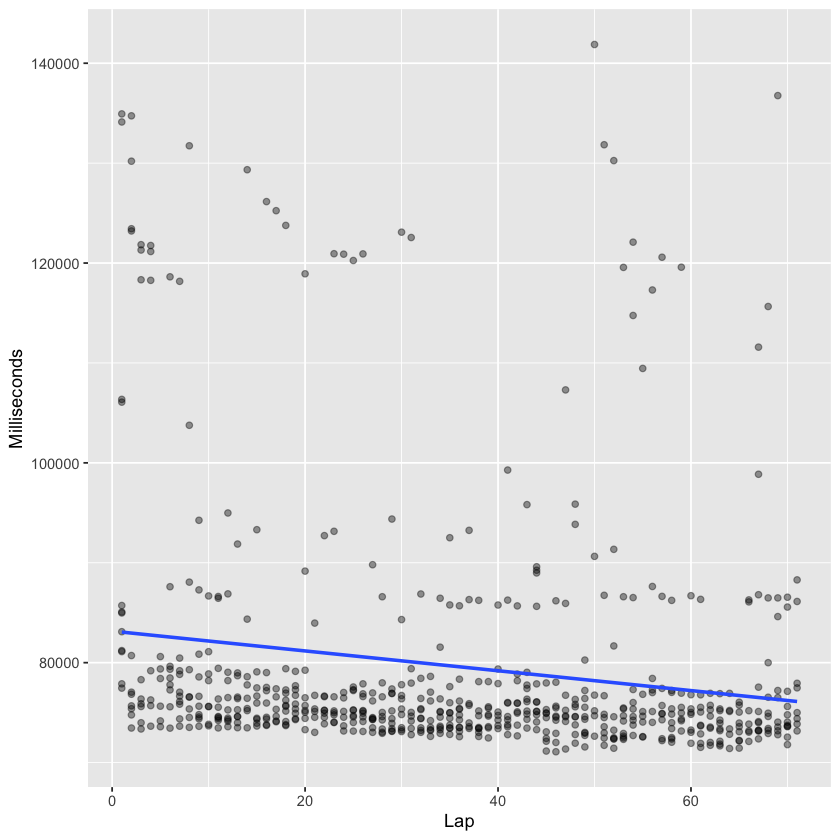

In [28]:
#21. Brazil

lh_brazil <- ham_laps %>%
                filter(raceId %in% brazil_race_ID) 

lh_brazil_clean <- lh_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 71| n == 70)

lh_brazil_clean_ID <- lh_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_brazil_races <- ham_laps %>%
                    filter(raceId %in% lh_brazil_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(lh_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r21_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r21_rmse

### GETS PREDICTION

get_brazil_prediction()

raceId,n
<dbl>,<int>
355,55
858,55
897,55
918,55
945,55
968,55
988,55
1009,55
1030,55


`geom_smooth()` using formula 'y ~ x'



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,7675.912


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6171997,102.8666,1.714444


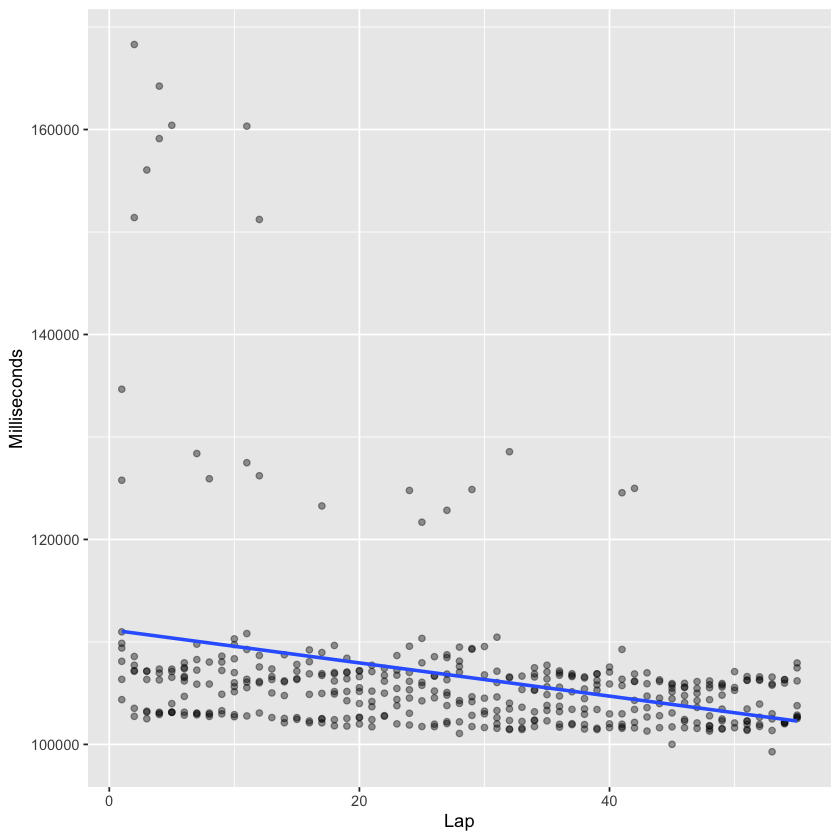

In [29]:
#22.  Abu Dhabi

lh_uae <- ham_laps %>%
                filter(raceId %in% uae_race_ID) 

lh_uae_clean <- lh_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) %>%
                        filter(n == 55)
lh_uae_clean
lh_uae_clean_ID <- lh_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

lh_uae_races <- ham_laps %>%
                    filter(raceId %in% lh_uae_clean_ID)

formulaone_split <- initial_split(lh_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

lh_r22_rmse <-  formulaone_test_results %>%
                filter(.metric == "rmse")

lh_r22_rmse

### GETS PREDICTION

get_uae_prediction()

## Combinining Season Data (Racetime and RMSE)